In [2]:
# Instalación de la librería opendatasets, que permite descargar datasets de Kaggle.
!pip install opendatasets

# Importación de las librerías necesarias para el análisis de datos y visualización.
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Enlace al dataset en Kaggle. Este enlace se usará para descargar el conjunto de datos.
dataset_link = "https://www.kaggle.com/datasets/humairmunir/anaemia-prediction"

# Descarga del dataset usando la librería opendatasets.
od.download(dataset_link)

# Cambia el directorio de trabajo a la carpeta donde se descargó el dataset.
os.chdir("anaemia-prediction")

# Lista los archivos en el directorio actual para confirmar la descarga.
os.listdir()

# Nombre del archivo CSV que contiene los datos.
archivo = "output.csv"

# Lectura del archivo CSV en un DataFrame de pandas para su análisis.
df = pd.read_csv(archivo)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: freddygo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/humairmunir/anaemia-prediction


100%|██████████| 1.85k/1.85k [00:00<00:00, 296kB/s]

In [3]:
# Imprime el número de filas y columnas en el DataFrame.
# df.shape[0] obtiene el número de filas y df.shape[1] obtiene el número de columnas.
print("El data set tiene {} filas y {} columnas :)".format(df.shape[0], df.shape[1]))

# Muestra las primeras cuatro filas del DataFrame para dar un vistazo a los datos.
df.head(4)

El data set tiene 104 filas y 7 columnas :)


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No


In [4]:
# Calcula y muestra la cantidad de valores nulos (NaN) en cada columna del DataFrame.
# Luego, sumamos por columna con sum() para obtener el total de valores nulos en cada una.
df.isna().sum()

,0
Number,0
Sex,0
%Red Pixel,0
%Green pixel,0
%Blue pixel,0
Hb,0
Anaemic,0


In [5]:
# Eliminamos la columna "Number" del DataFrame df. ya que no nos proporciona información de utilidad
df = df.drop("Number", axis=1)

In [6]:
# Devuelve una lista de los valores únicos presentes en la columna "Sex" del DataFrame df
# y verificamos que no haya valores duplicados que signifiquen lo mismo. Ejemplo ("Masculino", "masculino")
unique_values = df["Sex"].unique()
unique_values

array(['M', 'F', 'F ', 'M '], dtype=object)

In [7]:
# Paso 1: Normalizar los valores en la columna "Sex" (quitar espacios en blanco)
df['Sex'] = df['Sex'].str.strip()

# Paso 2: Agrupar los datos por 'Sex' y sumar los valores
result = df.groupby('Sex', as_index=False).sum()
df["Sex"].unique()

array(['M', 'F'], dtype=object)

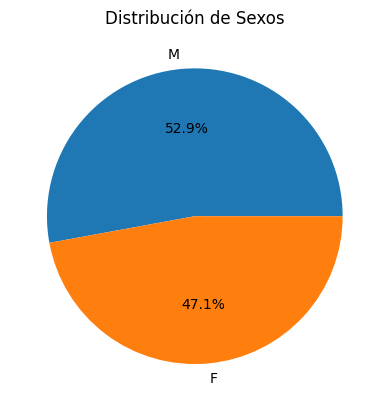

In [8]:
# Crea un gráfico de pastel (pie chart) que muestra la distribución de los valores en la columna "Sex".
plt.pie(
    df["Sex"].value_counts(),  # Contamos la frecuencia de cada categoría en la columna "Sex".
    labels=df["Sex"].value_counts().index,  # Usamos los nombres de las categorías como etiquetas.
    autopct="%1.1f%%"  # Formato para mostrar el porcentaje en cada porción del gráfico.
)

# Añade un título al gráfico.
plt.title("Distribución de Sexos")

# Muestra el gráfico en la pantalla.
plt.show()

In [9]:
# Importa la clase LabelEncoder de scikit-learn, que se utiliza para convertir categorías en números.
from sklearn.preprocessing import LabelEncoder

# Crea una instancia del objeto LabelEncoder.
label_encoder = LabelEncoder()

# Aplica el codificador para transformar la columna "Sex" en valores numéricos.
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [10]:
# Verificamos que se realicen los cambios en la columna "Sex" correctamente
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,Yes
1,0,45.6033,28.1900,26.2067,13.5,No
2,0,45.0107,28.9677,26.0215,11.7,No
3,0,44.5398,28.9899,26.4703,13.5,No
4,1,43.2870,30.6972,26.0158,12.4,No


## Fin de Sex

In [11]:
# Este método proporciona estadísticas descriptivas sobre la columna, como el conteo, la media,
# la desviación estándar, los valores mínimos y máximos, y los percentiles.
df['%Red Pixel'].describe()

,%Red Pixel
count,104.000000
mean,45.654175
std,2.816294
min,38.796800
25%,43.911375
50%,45.385350
75%,46.968325
max,54.647800


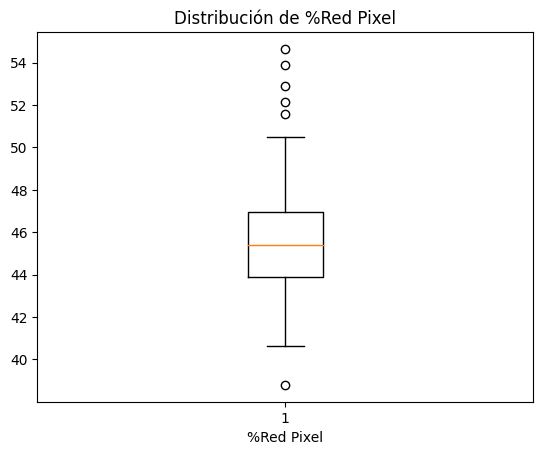

In [12]:
# Crea un gráfico de caja (boxplot) para visualizar la distribución de los datos en la columna '%Red Pixel'.
plt.boxplot(df['%Red Pixel'])

# Agrega una etiqueta al eje x, indicando que se refiere a '%Red Pixel'.
plt.xlabel('%Red Pixel')

# Establece el título del gráfico. Este título describe el contenido del gráfico.
plt.title('Distribución de %Red Pixel')

# Muestra el gráfico en la pantalla.
plt.show()

In [13]:
# Calcular el primer cuartil (Q1) de la columna '%Red Pixel'.
Q1_Red = df['%Red Pixel'].quantile(0.25)

# Calcular el tercer cuartil (Q3) de la columna '%Red Pixel'.
Q3_Red = df['%Red Pixel'].quantile(0.75)

# Calcular el rango intercuartílico (IQR) restando Q1 de Q3.
IQR_Red = Q3_Red - Q1_Red

# Definir el límite inferior, que es Q1 menos 1.5 veces el IQR.
limite_inferior_Red = Q1_Red - 1.5 * IQR_Red

# Definir el límite superior, que es Q3 más 1.5 veces el IQR.
limite_superior_Red = Q3_Red + 1.5 * IQR_Red

In [14]:
df[(df['%Red Pixel'] < limite_inferior_Red) | (df['%Red Pixel'] > limite_superior_Red)]

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
64,0,38.7968,31.3618,29.8414,8.5,Yes
72,0,52.9108,26.7881,20.3010,11.5,No
75,1,53.9113,26.3455,19.7433,14.5,No
88,1,54.6478,25.8109,19.5413,15.2,No
95,1,52.1540,26.0853,21.7607,16.0,No
96,0,51.5802,28.2678,20.1520,13.2,No


In [15]:
# Reemplazar los outliers con el valor del limite inferior y superior
df.loc[df['%Red Pixel'] < limite_inferior_Red, '%Red Pixel'] = limite_inferior_Red
df.loc[df['%Red Pixel'] > limite_superior_Red, '%Red Pixel'] = limite_superior_Red

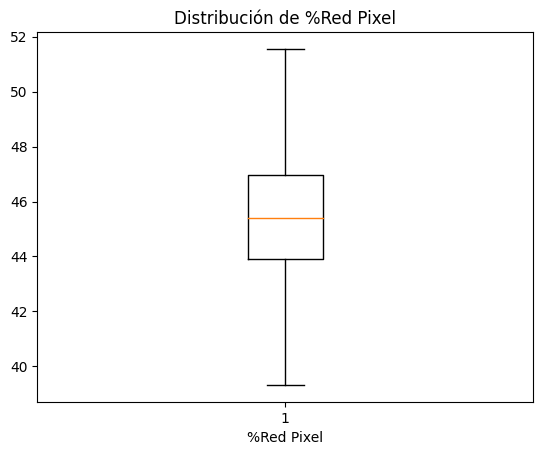

In [16]:
# Genera un gráfico de caja (boxplot) para la columna '%Red Pixel'.
plt.boxplot(df['%Red Pixel'])

# Establece la etiqueta del eje x, indicando que el eje representa los valores de '%Red Pixel'.
plt.xlabel('%Red Pixel')

# Establece el título del gráfico, proporcionando contexto sobre lo que se está visualizando.
plt.title('Distribución de %Red Pixel')

# Muestra el gráfico en la pantalla.
plt.show()

## Fin de Red Pixel

In [17]:
# Se utiliza el método describe() para obtener estadísticas descriptivas de la columna '%Green pixel'.
df['%Green pixel'].describe()

,%Green pixel
count,104.000000
mean,28.875507
std,1.554275
min,25.140300
25%,27.871300
50%,28.948750
75%,29.887275
max,32.368100


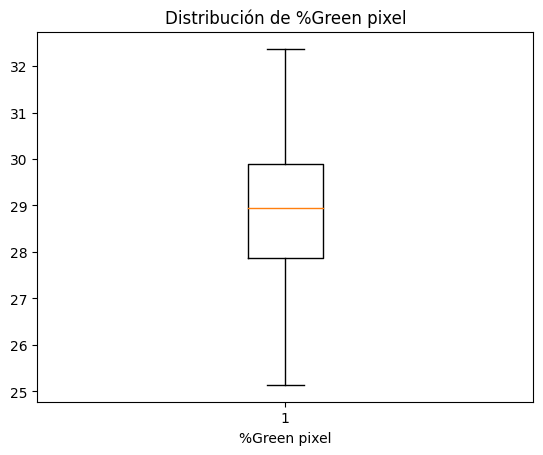

In [18]:
# Genera un gráfico de caja (boxplot) para la columna '%Green pixel'.
plt.boxplot(df['%Green pixel'])

# Establece la etiqueta del eje x, apuntando a que este eje representa los valores de '%Green pixel'.
plt.xlabel('%Green pixel')

# Establece el título del gráfico, proporcionando contexto sobre lo que se está visualizando.
plt.title('Distribución de %Green pixel')

# Muestra el gráfico en la pantalla.
plt.show()

In [19]:
Q1_Green = df['%Green pixel'].quantile(0.25)
Q3_Green = df['%Green pixel'].quantile(0.75)

# Calcular el IQR
IQR_Green = Q3_Green - Q1_Green

# Definir los límites superior e inferior
limite_inferior_Green = Q1_Green - 1.5 * IQR_Green
limite_superior_Green = Q3_Green + 1.5 * IQR_Green
outliers_Green = (df['%Green pixel'] < limite_inferior_Green) | (df['%Green pixel'] > limite_superior_Green)

In [20]:
# Filtra filas donde '%Green pixel' está fuera del rango definido por los límites inferior y superior.
df[(df['%Green pixel'] < limite_inferior_Green) | (df['%Green pixel'] > limite_superior_Green)]

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic


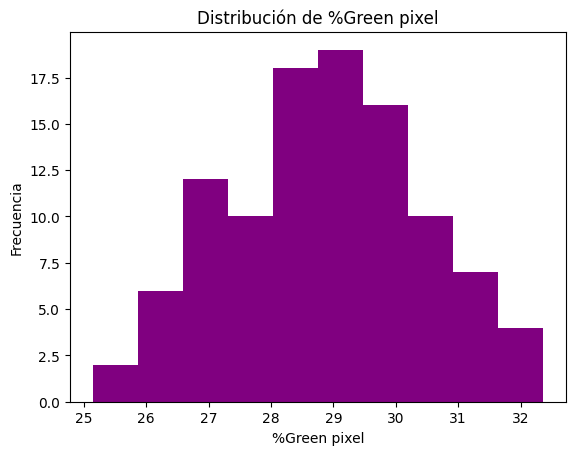

In [23]:
# Crea un histograma para mostrar la distribución de frecuencias de los valores en la columna '%Green pixel'.
plt.hist(df['%Green pixel'], bins=10, color='purple')
plt.xlabel('%Green pixel')
plt.ylabel('Frecuencia')
plt.title('Distribución de %Green pixel')
plt.show()

## Fin de Green Pixel

In [24]:
# Genera estadísticas descriptivas (como media, mediana, cuartiles, etc.) para la columna '%Blue pixel'.
df['%Blue pixel'].describe()

,%Blue pixel
count,104.000000
mean,25.470325
std,1.984671
min,19.541300
25%,24.896425
50%,25.953200
75%,26.721600
max,29.841400


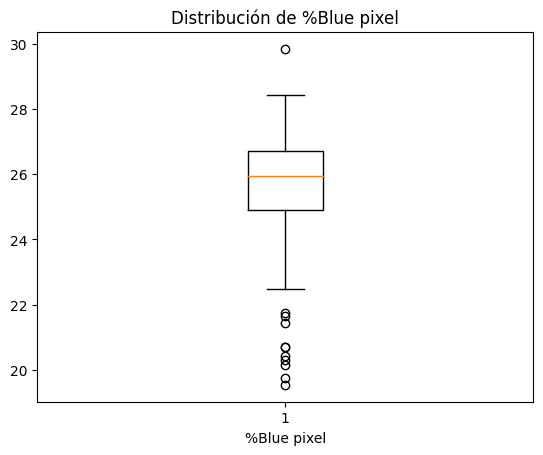

In [25]:
# Crea un diagrama de caja para visualizar la distribución de los valores en la columna '%Blue pixel'.
plt.boxplot(df['%Blue pixel'])
plt.xlabel('%Blue pixel')
plt.title('Distribución de %Blue pixel')
plt.show()

In [26]:
# Calculamos el Q1 y el Q3
Q1_Blue = df['%Blue pixel'].quantile(0.25)
Q3_Blue = df['%Blue pixel'].quantile(0.75)

# Calcular el IQR
IQR_Blue = Q3_Blue - Q1_Blue

# Definir los límites superior e inferior
limite_inferior_Blue = Q1_Blue - 1.5 * IQR_Blue
limite_superior_Blue = Q3_Blue + 1.5 * IQR_Blue

In [27]:
# Filtra el DataFrame para obtener las filas donde los valores de '%Blue pixel' son menores que 'limite_inferior_Blue' o mayores que 'limite_superior_Blue'.
df[(df['%Blue pixel'] < limite_inferior_Blue) | (df['%Blue pixel'] > limite_superior_Blue)]

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
59,0,50.35620,29.2206,20.4232,11.9,No
64,0,39.32595,31.3618,29.8414,8.5,Yes
72,0,51.55375,26.7881,20.3010,11.5,No
73,1,50.49760,28.8065,20.6960,11.1,No
75,1,51.55375,26.3455,19.7433,14.5,No
76,0,49.58990,28.9754,21.4347,9.9,Yes
88,1,51.55375,25.8109,19.5413,15.2,No
89,1,48.87630,29.4806,21.6431,12.5,No
95,1,51.55375,26.0853,21.7607,16.0,No
96,0,51.55375,28.2678,20.1520,13.2,No


In [28]:
# Reemplazar los outliers con el valor del IQR
df.loc[df['%Blue pixel'] < limite_inferior_Blue, '%Blue pixel'] = limite_inferior_Blue
df.loc[df['%Blue pixel'] > limite_superior_Blue, '%Blue pixel'] = limite_superior_Blue

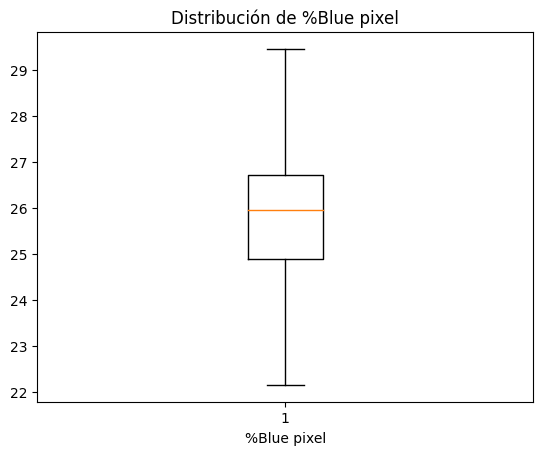

In [31]:
# Crea un diagrama de caja para visualizar la distribución de los valores en la columna '%Blue pixel'.
plt.boxplot(df['%Blue pixel'])
plt.xlabel('%Blue pixel')
plt.title('Distribución de %Blue pixel')
plt.show()

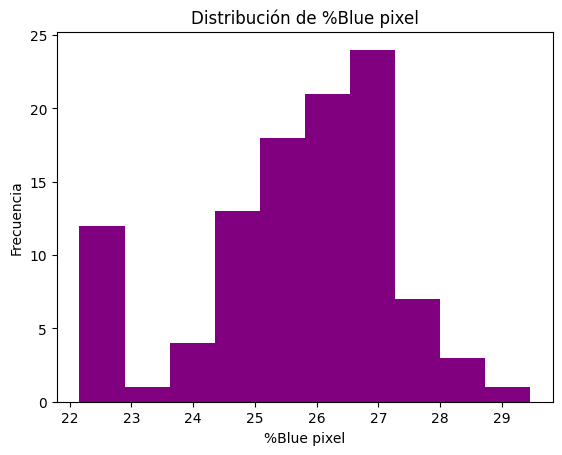

In [32]:
# Crea un histograma de la columna '%Blue pixel' con 10 bins, color púrpura, y establece las etiquetas y el título del gráfico.
plt.hist(df['%Blue pixel'], bins=10, color='purple')
plt.xlabel('%Blue pixel')
plt.ylabel('Frecuencia')
plt.title('Distribución de %Blue pixel')
plt.show()

## Fin de Blue Pixel

In [33]:
# Muestra estadísticas descriptivas (como conteo, media, desviación estándar, valores mínimo y máximo, y cuartiles) de la columna "Hb" del DataFrame.
df["Hb"].describe()

,Hb
count,104.000000
mean,12.150962
std,2.512957
min,2.800000
25%,10.650000
50%,12.600000
75%,14.000000
max,16.300000


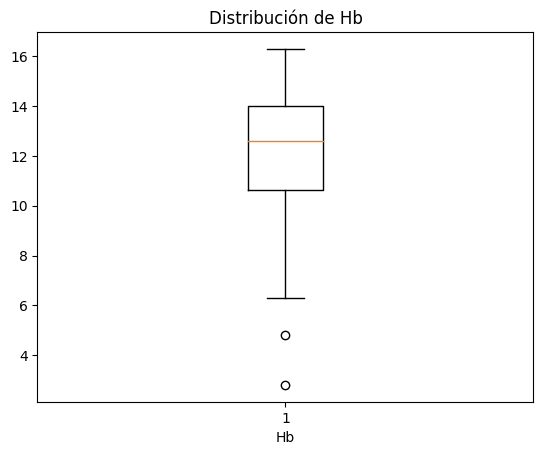

In [34]:
# Crea un diagrama de caja para visualizar la distribución de los valores en la columna 'Hb', establece la etiqueta del eje x y el título del gráfico.
plt.boxplot(df['Hb'])
plt.xlabel('Hb')
plt.title('Distribución de Hb')
plt.show()

In [35]:
#Calculamos el Q1 y el Q3
Q1_Hb = df['Hb'].quantile(0.25)
Q3_Hb = df['Hb'].quantile(0.75)

# Calcular el IQR
IQR_Hb = Q3_Hb - Q1_Hb

# Definir los límites superior e inferior
limite_inferior_Hb = Q1_Hb - 1.5 * IQR_Hb
limite_superior_Hb = Q3_Hb + 1.5 * IQR_Hb

In [38]:
# Filtra el DataFrame 'df' para obtener las filas donde el valor de 'Hb' es menor que 'limite_inferior_Hb' o mayor que 'limite_superior_Hb'.
df_outliers = df[(df['Hb'] < limite_inferior_Hb) | (df['Hb'] > limite_superior_Hb)]
df_outliers

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
12,0,44.9642,30.5279,24.5079,4.8,Yes
58,1,40.6395,32.1891,27.1714,2.8,Yes


In [39]:
# Reemplazar los outliers con el valor del IQR
df.loc[df['Hb'] < limite_inferior_Hb, 'Hb'] = limite_inferior_Hb
df.loc[df['Hb'] > limite_superior_Hb, 'Hb'] = limite_superior_Hb

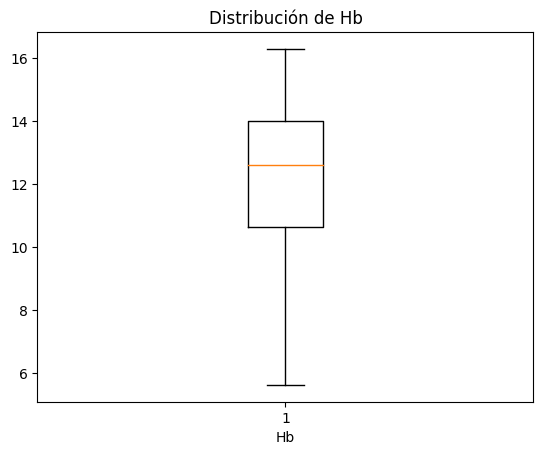

In [40]:
# Crea un diagrama de caja (boxplot) para visualizar la distribución de los valores de hemoglobina ('Hb') en el DataFrame 'df'.
plt.boxplot(df['Hb'])  # Dibuja el boxplot de la columna 'Hb'
plt.xlabel('Hb')       # Etiqueta del eje x
plt.title('Distribución de Hb')  # Título del gráfico
plt.show()            # Muestra el gráfico en pantalla

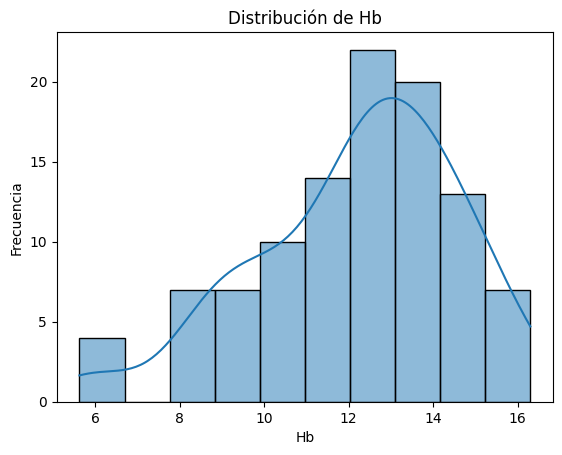

In [41]:
# Crea un histograma con una estimación de densidad (KDE) para visualizar la distribución de los valores de hemoglobina ('Hb') en el DataFrame 'df'.
sns.histplot(df['Hb'], bins=10, kde=True)
plt.xlabel('Hb')
plt.ylabel('Frecuencia')
plt.title('Distribución de Hb')
plt.show()

## Fin de Hb

Anaemic
No     78
Yes    26
Name: count, dtype: int64


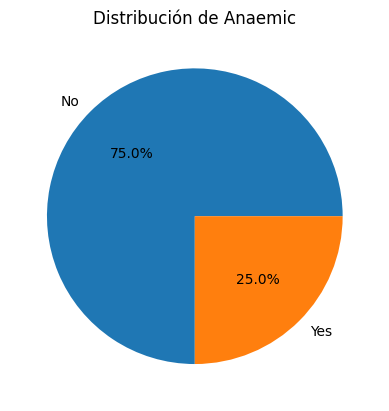

In [42]:
# Imprime el conteo de valores únicos en la columna 'Anaemic' del DataFrame 'df', mostrando cuántas veces aparece cada categoría.
print(df["Anaemic"].value_counts())

# Crea un gráfico de pastel (pie chart) para visualizar la distribución de los valores en la columna 'Anaemic'.
plt.pie(df["Anaemic"].value_counts(), labels=df["Anaemic"].value_counts().index,autopct="%1.1f%%")
plt.title("Distribución de Anaemic")
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder  # Importa la clase LabelEncoder de scikit-learn

# Crea una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Aplica el codificador a la columna 'Anaemic' del DataFrame 'df'
# Esto convierte las categorías de texto en valores numéricos (0, 1, 2, etc.)
df['Anaemic'] = label_encoder.fit_transform(df['Anaemic'])

In [44]:
# Verificamos el data set para verificar los cambios hechos anteriormente en la columna Anaemic
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,0,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,1,43.2870,30.6972,26.0158,12.4,0


## Fin de Aneamic

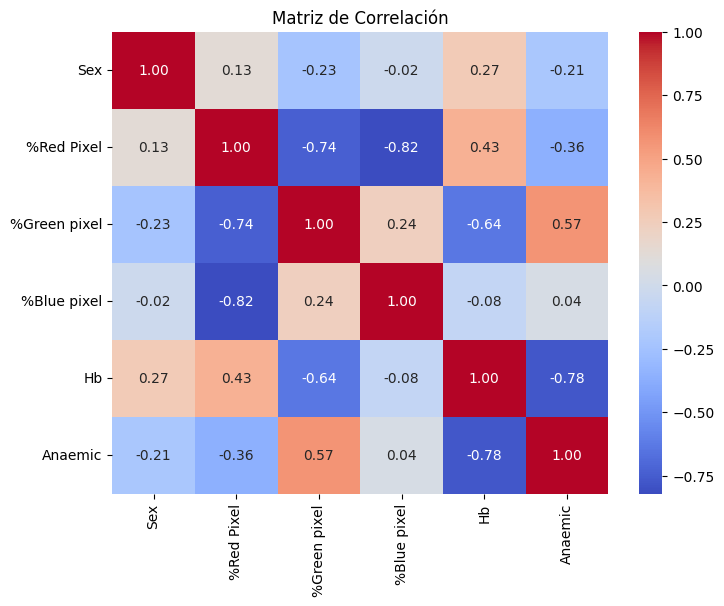

In [45]:
# Calcula la matriz de correlación del DataFrame 'df'
correlation_matrix = df.corr()

# Establece el tamaño de la figura para el gráfico
plt.figure(figsize=(8, 6))

# Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Matriz de Correlación")

# Muestra el gráfico en pantalla
plt.show()

In [46]:
# Importa la clase LinearRegression de scikit-learn para crear modelos de regresión lineal
from sklearn.linear_model import LinearRegression

# Importa la función train_test_split para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importa métricas para evaluar el rendimiento del modelo, como el error cuadrático medio y el coeficiente de determinación R^2
from sklearn.metrics import mean_squared_error, r2_score

# Importa funciones para generar conjuntos de datos sintéticos para clasificación
from sklearn.datasets import make_classification

# Importa funciones para generar conjuntos de datos sintéticos para regresión
from sklearn.datasets import make_regression

In [154]:
# Importa la función make_regression para generar conjuntos de datos sintéticos para problemas de regresión
from sklearn.datasets import make_regression

# Importa la función train_test_split para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Separa las características (X) del objetivo (y)
# 'X' contiene todas las columnas del DataFrame 'df' excepto la columna 'Anaemic'
X = df.drop(columns=['Anaemic'])

# 'y' contiene únicamente la columna 'Anaemic', que es la variable objetivo que se quiere predecir
y = df['Anaemic']

In [155]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [156]:
# Crea una instancia del modelo de regresión lineal
model = LinearRegression(fit_intercept=True)

# Ajusta el modelo a los datos de entrenamiento
model.fit(X_train, Y_train)

LinearRegression()

In [157]:
# Imprime los coeficientes del modelo de regresión lineal
print("Coeficientes: ", model.coef_)

# Imprime la ordenada al origen (intercepto) del modelo
print("Ordenada al origen: ", model.intercept_)

Coeficientes:  [-0.07283268  0.12179049  0.17388849  0.10582171 -0.11866258]
Ordenada al origen -11.531920487694586


In [158]:
# Realiza predicciones utilizando el modelo ajustado
y_pred = model.predict(X_test)

In [131]:
# Calcula el error cuadrático medio (MSE) entre las predicciones y los valores reales
mse = mean_squared_error(y_pred, Y_test)

# Imprime el valor del error cuadrático medio
print("MSE: ", mse)

MSE:  0.08275131886318082


In [159]:
# Calcula el coeficiente de determinación R² entre las predicciones y los valores reales
r2 = r2_score(y_pred, Y_test)

# Imprime el valor del coeficiente de determinación R²
print("R²: ", r2)

r2 0.23506488985268081


In [60]:
# Importa la clase RandomForestRegressor de la biblioteca sklearn.ensemble
# RandomForestRegressor es un modelo de regresión basado en el algoritmo de bosques aleatorios
from sklearn.ensemble import RandomForestRegressor

In [161]:
# Crea y entrena un modelo RandomForestRegressor con 34 árboles, profundidad máxima de 15, semilla aleatoria 42 y mínimo de 25 muestras para dividir nodos; luego realiza predicciones sobre el conjunto de prueba y evalúa su rendimiento.
rfc = RandomForestRegressor(n_estimators=34, max_depth=15, random_state=42, min_samples_split=25)
rfc.fit(X_train, Y_train)
print(rfc.predict(X_test))
print(rfc.score(X_test, Y_test))

[0.17901494 0.         0.         0.17901494 0.         0.
 0.         0.01470588 0.         0.05587068 0.         0.
 0.99414423 0.99414423 0.         0.17901494 0.00653595 0.00653595
 0.99414423 0.26828898 0.00653595 0.35362135 0.99414423 0.
 0.         0.05065359 0.         0.         0.         0.
 0.         0.        ]


0.8596522008282987

El modelo de RandomForestRegressor, nos dio casi un 86% de confianza, pero ahora probaremos a hacer un submuestreo de la clase minoritaria


Submuestreo de no anémicos:
     Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
42     1    46.76280       28.0180    25.219200  15.2        0
1      0    45.60330       28.1900    26.206700  13.5        0
43     1    44.95260       28.4671    26.580300  13.1        0
20     0    44.91160       30.3761    24.712300  11.6        0
15     1    45.58420       28.7311    25.684800  14.0        0
103    0    43.57060       29.8094    26.619900  12.2        0
39     1    46.14490       27.7085    26.146600  14.1        0
5      1    45.09940       27.9645    26.936100  16.2        0
59     0    50.35620       29.2206    22.158662  11.9        0
88     1    51.55375       25.8109    22.158662  15.2        0
83     1    45.47350       27.9181    26.608400  16.0        0
31     1    48.63580       26.6982    24.666000  15.0        0
96     0    51.55375       28.2678    22.158662  13.2        0
70     0    44.19950       29.4860    26.314500  11.2        0
27     1    44.32970      

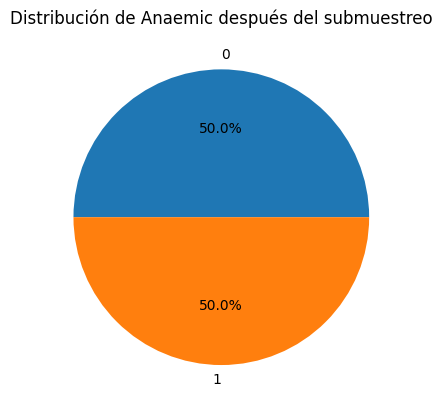

In [47]:
no_anemicos_subsample = df[df['Anaemic'] == 0].sample(n=26, random_state=42)  # Cambia n a lo que necesites o usa min(n_anemicos, len(df[df['Anaemic'] == 0]))
anemicos_subsample = df[df['Anaemic'] == 1]

# Verifica si los submuestreos se generaron correctamente
print("\nSubmuestreo de no anémicos:")
print(no_anemicos_subsample)

print("\nSubmuestreo de anémicos:")
print(anemicos_subsample)

# Combina grupos submuestreados
subsample = pd.concat([no_anemicos_subsample, anemicos_subsample])

# Gráfico de pastel
plt.pie(subsample["Anaemic"].value_counts(), labels=subsample["Anaemic"].value_counts().index, autopct="%1.1f%%")
plt.title("Distribución de Anaemic después del submuestreo")
plt.show()

In [50]:
subsample.shape

(52, 6)

In [51]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X = subsample.drop(columns=['Anaemic'])
y = subsample['Anaemic']

In [52]:
X_train, X_test, Y_train, Y_test= train_test_split(X,y,train_size=.7, random_state=1)

In [53]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

LinearRegression()

In [54]:
print("Coeficientes: ",model.coef_)
print("Ordenada al origen", model.intercept_)

Coeficientes:  [-0.05843325 -0.02208482 -0.04302415 -0.04744169 -0.14228377]
Ordenada al origen 5.56433876160483


In [55]:
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_pred,Y_test)
print("MSE: ", mse)

MSE:  0.10882190876094444


In [57]:
subsample.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
42,1,46.7628,28.0180,25.2192,15.2,0
1,0,45.6033,28.1900,26.2067,13.5,0
43,1,44.9526,28.4671,26.5803,13.1,0
20,0,44.9116,30.3761,24.7123,11.6,0
15,1,45.5842,28.7311,25.6848,14.0,0


In [58]:
r2 = r2_score(y_pred,Y_test)
print("r2", r2)

r2 -0.06639440247982265


In [61]:
rfc = RandomForestRegressor(n_estimators=34,max_depth=15, random_state=42,min_samples_split=25)
rfc.fit(X_train, Y_train)
print(rfc.predict(X_test))
rfc.score(X_test, Y_test)

[0.57679739 0.35298304 0.57679739 0.57679739 0.57679739 0.57679739
 0.57679739 0.57679739 0.57679739 0.57679739 0.35298304 0.35298304
 0.35298304 0.57679739 0.35298304 0.57679739]


0.26755069510947993